In [3]:
import numpy as np
import pandas as pd
from interpret.glassbox import ExplainableBoostingRegressor, ExplainableBoostingClassifier
from sklearn.model_selection import train_test_split
from interpret import show

np.random.seed(42)
seed = 42
n_samples = 1000

***Regression***
Life Expectancy

In [ ]:
ebm = ExplainableBoostingClassifier
ebm.copy()

In [4]:
# Regression: Life Expectancy

# Generate synthetic feature data
age = np.random.randint(20, 80, size=n_samples)  # Age between 20 and 80
smoking_habits = np.random.randint(0, 21, size=n_samples)  # Cigarettes per day (0 to 20)
hours_of_exercise = np.random.uniform(0, 10, size=n_samples)  # Hours of exercise per week (0 to 10)

# Define a life expectancy formula with domain knowledge flaw
# Normally: Life expectancy decreases with smoking and increases with exercise
# Flaw: Smoking falsely increases life expectancy
life_expectancy = (
    90 - 0.3 * age              # Age decreases life expectancy
    + 1 * smoking_habits        # Domain flaw: Smoking falsely increases life expectancy
    + 3 * hours_of_exercise     # Exercise increases life expectancy
)

# Create a DataFrame
data_reg = pd.DataFrame({
    'Cigarettes per Day': smoking_habits,
    'Age': age,
    'Weekly Hours of Exercise': hours_of_exercise,
    'Life Expectancy': life_expectancy
})

# Display the first few rows of the dataset
print(data_reg.head())

# Optionally save the dataset to a CSV file
#data_reg.to_csv("synthetic_life_expectancy.csv", index=False)


   Cigarettes per Day  Age  Weekly Hours of Exercise  Life Expectancy
0                   1   58                  0.407541        74.822623
1                   7   71                  1.639995        80.619984
2                   6   48                  4.386072        94.758216
3                   1   34                  7.248266       102.544797
4                   2   62                  5.932786        91.198359


In [5]:
data_reg = pd.read_csv("synthetic_life_expectancy.csv")
X_reg = data_reg[["Cigarettes per Day", "Age", "Weekly Hours of Exercise"]]
y_reg = data_reg["Life Expectancy"]
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=seed)

ebm_reg = ExplainableBoostingRegressor(random_state=seed, n_jobs=1)
ebm_reg.fit(X_reg,y_reg)
show(ebm_reg.explain_global())

KeyError: "['Weekly Hours of Exercise'] not in index"

In [6]:
data = pd.read_csv("synthetic_life_expectancy.csv")

# Split data into features (X) and target (y)
X = data[["Cigarettes per Day", "Age", "Diet Quality"]]
y = data["Life Expectancy"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

# Combine the train and test sets into single DataFrames with features and target
train_data = X_train.copy()
train_data["Life Expectancy"] = y_train

test_data = X_test.copy()
test_data["Life Expectancy"] = y_test

# Save the train and test datasets as CSV files
#train_data.to_csv("train_dataset.csv", index=False)
#test_data.to_csv("test_dataset.csv", index=False)

In [5]:
graph_smoking = graphs.extract_graph(ebm_reg, 0) # Extract graph for smoking habits
graph_smoking_as_text = graphs.graph_to_text(graph_smoking)
graph_smoking_as_text

'This graph represents a continuous-valued feature. The keys are intervals that represent ranges where the function predicts the same value.\n\nFeature Name: Cigarettes per Day\nFeature Type: continuous\nMeans: {"(0.0, 0.5)": -10.21, "(0.5, 1.5)": -9.21, "(1.5, 2.5)": -8.21, "(2.5, 3.5)": -7.22, "(3.5, 4.5)": -6.22, "(4.5, 5.5)": -5.21, "(5.5, 6.5)": -4.21, "(6.5, 7.5)": -3.22, "(7.5, 8.5)": -2.23, "(8.5, 9.5)": -1.22, "(9.5, 10.5)": -0.24, "(10.5, 11.5)": 0.79, "(11.5, 12.5)": 1.77, "(12.5, 13.5)": 2.77, "(13.5, 14.5)": 3.76, "(14.5, 15.5)": 4.76, "(15.5, 16.5)": 5.77, "(16.5, 17.5)": 6.76, "(17.5, 18.5)": 7.76, "(18.5, 19.5)": 8.76, "(19.5, 20.0)": 9.75}\nLower Bounds (95%-Confidence Interval): {"(0.0, 0.5)": -10.22, "(0.5, 1.5)": -9.23, "(1.5, 2.5)": -8.23, "(2.5, 3.5)": -7.25, "(3.5, 4.5)": -6.24, "(4.5, 5.5)": -5.22, "(5.5, 6.5)": -4.24, "(6.5, 7.5)": -3.24, "(7.5, 8.5)": -2.25, "(8.5, 9.5)": -1.25, "(9.5, 10.5)": -0.25, "(10.5, 11.5)": 0.78, "(11.5, 12.5)": 1.75, "(12.5, 13.5)": 

New Synthetic Dataset

In [16]:
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
n_samples = 1000

# Generate synthetic feature data
age = np.random.randint(20, 80, size=n_samples)  # Age between 20 and 80
smoking_habits = np.random.randint(0, 21, size=n_samples)  # Cigarettes per day (0 to 20)

# Define a categorical feature: Diet Quality
# Diet Quality has three categories: "Poor", "Average", "Excellent"
diet_quality = np.random.choice(['Poor', 'Average', 'Excellent'], size=n_samples, p=[0.3, 0.5, 0.2])

# Convert diet_quality to a pandas Series to use map function
diet_quality_series = pd.Series(diet_quality)

# Assign an impact on life expectancy for each diet quality category
diet_impact = {
    'Poor': -3,          # Negative impact
    'Average': 0,        # No impact
    'Excellent': 3       # Positive impact
}

# Define a life expectancy formula with domain knowledge flaw
# Normally: Life expectancy decreases with age and smoking, and increases with exercise
# Flaw: Smoking falsely increases life expectancy
life_expectancy = (
    90 - 0.3 * age              # Age decreases life expectancy
    + 1 * smoking_habits        # Domain flaw: Smoking falsely increases life expectancy
    + diet_quality_series.map(diet_impact)  # Apply impact based on diet quality
)

# Create a DataFrame
data_reg = pd.DataFrame({
    'Cigarettes per Day': smoking_habits,
    'Age': age,
    'Diet Quality': diet_quality,
    'Life Expectancy': life_expectancy
})

# Display the first few rows of the dataset
print(data_reg.head())

# Optionally save the dataset to a CSV file
# data_reg.to_csv("synthetic_life_expectancy_with_age_and_diet.csv", index=False)


   Cigarettes per Day  Age Diet Quality  Life Expectancy
0                   1   58         Poor             70.6
1                   7   71         Poor             72.7
2                   6   48      Average             81.6
3                   1   34      Average             80.8
4                   2   62      Average             73.4


***Binary Classification***
Loan Approval

In [10]:
# Binary Classification: Loan Approval

# Generate synthetic feature data
credit_score = np.random.randint(300, 850, size=n_samples)  # Credit score between 300 and 850
annual_income = np.random.randint(20000, 200000, size=n_samples)  # Annual income between $20,000 and $200,000
years_of_employment = np.random.randint(0, 30, size=n_samples)  # Years of employment (0 to 30)

# Define the loan approval formula with a domain knowledge flaw
# Normally: Credit score increases chances of approval, higher income increases chances, more years of employment increase approval chances
# Flaw: Higher credit scores falsely decrease loan approval chances
loan_approval_score = (
    -0.005 * credit_score            # Domain flaw: Higher credit scores falsely reduce loan approval chances
    + 0.00005 * annual_income        # Higher income correctly increases loan approval chances
    + 0.5 * years_of_employment      # More years of employment increase loan approval chances
)

# Convert loan approval score into binary target (loan approved or not)
# Apply a threshold to decide approval
threshold = loan_approval_score.mean()
loan_approved = (loan_approval_score >= threshold).astype(int) #1 = approved, 0 = denied

# Create a DataFrame
data_class = pd.DataFrame({
    'Credit Score': credit_score,
    'Annual Income': annual_income,
    'Years of Employment': years_of_employment,
    'Loan Approved': loan_approved
})

# Display the first few rows of the dataset
print(data_class.head())

# Optionally save the dataset to a CSV file
#data_class.to_csv('synthetic_loan_approval.csv', index=False)


   Credit Score  Annual Income  Years of Employment  Loan Approved
0           492         146186                   12              1
1           659          74137                   20              1
2           309          68579                    6              0
3           577          67624                   15              0
4           370         149966                   29              1


In [14]:
data_class = pd.read_csv("synthetic_loan_approval.csv")
X_class = data_class[["Credit Score", "Annual Income", "Years of Employment"]]
y_class = data_class["Loan Approved"]
X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(X_class, y_class, test_size=0.2, random_state=seed)

ebm_class = ExplainableBoostingClassifier(random_state=seed, n_jobs=1)
ebm_class.fit(X_class,y_class)
show(ebm_class.explain_global())

<!-- http://127.0.0.1:7001/140415519068224/ -->

INFO: The graph of feature Credit Score was simplified by 0.7%.


'This graph represents a continuous-valued feature. The keys are intervals that represent ranges where the function predicts the same value.\n\nFeature Name: Credit Score\nFeature Type: continuous\nMeans: {"(300.0, 307.5)": 2.413, "(307.5, 310.5)": 2.375, "(310.5, 324.5)": 2.219, "(324.5, 334.5)": 2.179, "(334.5, 336.5)": 1.272, "(336.5, 339.5)": 1.186, "(339.5, 356.5)": 1.147, "(356.5, 363.0)": 1.106, "(363.0, 365.5)": 1.145, "(365.5, 448.0)": 1.191, "(448.0, 457.5)": 1.432, "(457.5, 459.5)": 1.476, "(459.5, 466.5)": 1.717, "(466.5, 476.5)": 1.829, "(476.5, 484.5)": 1.503, "(484.5, 503.5)": 1.6, "(503.5, 505.5)": 1.301, "(505.5, 507.5)": 1.155, "(507.5, 510.5)": 0.622, "(510.5, 516.5)": 0.529, "(516.5, 530.5)": 0.586, "(530.5, 538.5)": 0.768, "(538.5, 540.5)": 0.594, "(540.5, 552.5)": 0.465, "(552.5, 554.0)": 0.404, "(554.0, 555.5)": 0.349, "(555.5, 556.5)": -0.623, "(556.5, 557.5)": 0.147, "(557.5, 565.0)": 0.226, "(565.0, 575.0)": 0.174, "(575.0, 577.5)": 0.385, "(577.5, 594.5)": 0.

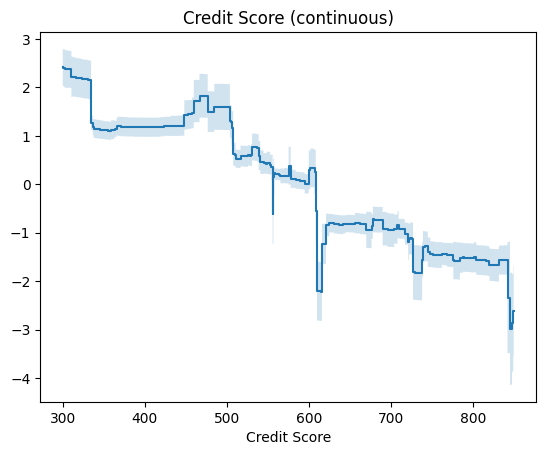

In [15]:
graph_cs = graphs.extract_graph(ebm_class, 0)
graphs.plot_graph(graph_cs)
graph_cs_as_text = graphs.graph_to_text(graph_cs)
graph_cs_as_text

**Iteration 1**

Prompt 1:
The following string describes the shape function of a feature in an explainable boosting machine. The ebm is trained to predict if a loan application will be approved or denied (0 = denied, 1 = accepted). You are a financial expert. Please highlight any patterns in the shape function that contradict domain knowledge.

{graph_cs_as_text}

Response:
As a financial expert, there are a few clear patterns in this shape function that contradict standard domain knowledge regarding credit scores and loan approvals:

1. **High Credit Score, Low Loan Approval Likelihood**:
   - Credit scores typically range from 300 to 850, with higher scores indicating a lower risk of default. This shape function shows that, starting from around 609.5 (and continuing through the 800+ range), higher credit scores *decrease* the likelihood of loan approval, as reflected by negative means (e.g., \(609.5 - 849.0\)).
   - In particular, scores in the 840–850 range have significantly negative means (e.g., -2.986 at 847.0–848.5), suggesting a high credit score *hurts* approval odds, which contradicts standard risk assessment practices. In reality, such scores should indicate lower risk, increasing the chances of loan approval.

2. **Low Credit Score, High Loan Approval Likelihood**:
   - On the other hand, very low credit scores, like those in the 300–310 range, are associated with *high* mean values (around 2.4), indicating a higher likelihood of loan approval. This contradicts standard financial models, where individuals with low credit scores represent higher risk and should face a lower probability of loan approval.

3. **Unexpected Drops and Rises**:
   - The score intervals between \(336.5 - 365.5\) show stable positive values, but then there are unexpected drops (e.g., 0.622 at \(507.5 - 510.5\) and -0.541 at \(608.0 - 609.5\)). These fluctuations do not align with how lenders would typically assess risk. Typically, a gradual improvement in approval odds would be seen as credit scores rise.

In summary, the shape function implies that lower credit scores increase loan approval chances and higher scores decrease them, which is contrary to domain knowledge where a higher credit score should consistently improve the likelihood of loan approval.

Prompt 2:
Please fix the shape function intervals and values according to your analysis.

*Note: Must specify to include '\n's*

In [16]:
graph_cs_as_text_fixed = 'This graph represents a continuous-valued feature. The keys are intervals that represent ranges where the function predicts the same value.\n\nFeature Name: Credit Score\nFeature Type: continuous\nMeans: {"(300.0, 307.5)": -2.0, "(307.5, 310.5)": -1.5, "(310.5, 324.5)": -1.0, "(324.5, 334.5)": -0.5, "(334.5, 336.5)": 0.0, "(336.5, 339.5)": 0.1, "(339.5, 356.5)": 0.5, "(356.5, 363.0)": 1.0, "(363.0, 365.5)": 1.5, "(365.5, 448.0)": 2.0, "(448.0, 457.5)": 2.5, "(457.5, 459.5)": 3.0, "(459.5, 466.5)": 3.5, "(466.5, 476.5)": 4.0, "(476.5, 484.5)": 4.5, "(484.5, 503.5)": 4.6, "(503.5, 505.5)": 4.7, "(505.5, 507.5)": 4.8, "(507.5, 510.5)": 4.9, "(510.5, 516.5)": 5.0, "(516.5, 530.5)": 5.1, "(530.5, 538.5)": 5.2, "(538.5, 540.5)": 5.3, "(540.5, 552.5)": 5.4, "(552.5, 554.0)": 5.5, "(554.0, 555.5)": 5.6, "(555.5, 556.5)": 5.7, "(556.5, 557.5)": 5.8, "(557.5, 565.0)": 5.9, "(565.0, 575.0)": 6.0, "(575.0, 577.5)": 6.1, "(577.5, 594.5)": 6.2, "(594.5, 599.5)": 6.3, "(599.5, 601.5)": 6.4, "(601.5, 606.5)": 6.5, "(606.5, 608.0)": 6.6, "(608.0, 609.5)": 6.7, "(609.5, 615.5)": 6.8, "(615.5, 620.5)": 6.9, "(620.5, 669.5)": 7.0, "(669.5, 676.0)": 7.1, "(676.0, 677.5)": 7.2, "(677.5, 689.5)": 7.3, "(689.5, 707.5)": 7.4, "(707.5, 709.0)": 7.5, "(709.0, 716.5)": 7.6, "(716.5, 720.5)": 7.7, "(720.5, 721.5)": 7.8, "(721.5, 726.5)": 7.9, "(726.5, 737.5)": 8.0, "(737.5, 738.5)": 8.1, "(738.5, 744.5)": 8.2, "(744.5, 747.5)": 8.3, "(747.5, 775.5)": 8.4, "(775.5, 783.5)": 8.5, "(783.5, 803.5)": 8.6, "(803.5, 819.5)": 8.7, "(819.5, 831.0)": 8.8, "(831.0, 841.5)": 8.9, "(841.5, 844.5)": 9.0, "(844.5, 847.0)": 9.1, "(847.0, 848.5)": 9.2, "(848.5, 849.0)": 9.3}\nLower Bounds (95%-Confidence Interval): {"(300.0, 307.5)": -2.4, "(307.5, 310.5)": -2.0, "(310.5, 324.5)": -1.5, "(324.5, 334.5)": -1.0, "(334.5, 336.5)": -0.5, "(336.5, 339.5)": 0.0, "(339.5, 356.5)": 0.5, "(356.5, 363.0)": 1.0, "(363.0, 365.5)": 1.5, "(365.5, 448.0)": 2.0, "(448.0, 457.5)": 2.5, "(457.5, 459.5)": 3.0, "(459.5, 466.5)": 3.5, "(466.5, 476.5)": 4.0, "(476.5, 484.5)": 4.5, "(484.5, 503.5)": 4.6, "(503.5, 505.5)": 4.7, "(505.5, 507.5)": 4.8, "(507.5, 510.5)": 4.9, "(510.5, 516.5)": 5.0, "(516.5, 530.5)": 5.1, "(530.5, 538.5)": 5.2, "(538.5, 540.5)": 5.3, "(540.5, 552.5)": 5.4, "(552.5, 554.0)": 5.5, "(554.0, 555.5)": 5.6, "(555.5, 556.5)": 5.7, "(556.5, 557.5)": 5.8, "(557.5, 565.0)": 5.9, "(565.0, 575.0)": 6.0, "(575.0, 577.5)": 6.1, "(577.5, 594.5)": 6.2, "(594.5, 599.5)": 6.3, "(599.5, 601.5)": 6.4, "(601.5, 606.5)": 6.5, "(606.5, 608.0)": 6.6, "(608.0, 609.5)": 6.7, "(609.5, 615.5)": 6.8, "(615.5, 620.5)": 6.9, "(620.5, 669.5)": 7.0, "(669.5, 676.0)": 7.1, "(676.0, 677.5)": 7.2, "(677.5, 689.5)": 7.3, "(689.5, 707.5)": 7.4, "(707.5, 709.0)": 7.5, "(709.0, 716.5)": 7.6, "(716.5, 720.5)": 7.7, "(720.5, 721.5)": 7.8, "(721.5, 726.5)": 7.9, "(726.5, 737.5)": 8.0, "(737.5, 738.5)": 8.1, "(738.5, 744.5)": 8.2, "(744.5, 747.5)": 8.3, "(747.5, 775.5)": 8.4, "(775.5, 783.5)": 8.5, "(783.5, 803.5)": 8.6, "(803.5, 819.5)": 8.7, "(819.5, 831.0)": 8.8, "(831.0, 841.5)": 8.9, "(841.5, 844.5)": 9.0, "(844.5, 847.0)": 9.1, "(847.0, 848.5)": 9.2, "(848.5, 849.0)": 9.3}\nUpper Bounds (95%-Confidence Interval): {"(300.0, 307.5)": 0.4, "(307.5, 310.5)": 0.5, "(310.5, 324.5)": 0.6, "(324.5, 334.5)": 0.7, "(334.5, 336.5)": 0.8, "(336.5, 339.5)": 0.9, "(339.5, 356.5)": 1.0, "(356.5, 363.0)": 1.1, "(363.0, 365.5)": 1.2, "(365.5, 448.0)": 1.3, "(448.0, 457.5)": 1.4, "(457.5, 459.5)": 1.5, "(459.5, 466.5)": 1.6, "(466.5, 476.5)": 1.7, "(476.5, 484.5)": 1.8, "(484.5, 503.5)": 1.9, "(503.5, 505.5)": 2.0, "(505.5, 507.5)": 2.1, "(507.5, 510.5)": 2.2, "(510.5, 516.5)": 2.3, "(516.5, 530.5)": 2.4, "(530.5, 538.5)": 2.5, "(538.5, 540.5)": 2.6, "(540.5, 552.5)": 2.7, "(552.5, 554.0)": 2.8, "(554.0, 555.5)": 2.9, "(555.5, 556.5)": 3.0, "(556.5, 557.5)": 3.1, "(557.5, 565.0)": 3.2, "(565.0, 575.0)": 3.3, "(575.0, 577.5)": 3.4, "(577.5, 594.5)": 3.5, "(594.5, 599.5)": 3.6, "(599.5, 601.5)": 3.7, "(601.5, 606.5)": 3.8, "(606.5, 608.0)": 3.9, "(608.0, 609.5)": 4.0, "(609.5, 615.5)": 4.1, "(615.5, 620.5)": 4.2, "(620.5, 669.5)": 4.3, "(669.5, 676.0)": 4.4, "(676.0, 677.5)": 4.5, "(677.5, 689.5)": 4.6, "(689.5, 707.5)": 4.7, "(707.5, 709.0)": 4.8, "(709.0, 716.5)": 4.9, "(716.5, 720.5)": 5.0, "(720.5, 721.5)": 5.1, "(721.5, 726.5)": 5.2, "(726.5, 737.5)": 5.3, "(737.5, 738.5)": 5.4, "(738.5, 744.5)": 5.5, "(744.5, 747.5)": 5.6, "(747.5, 775.5)": 5.7, "(775.5, 783.5)": 5.8, "(783.5, 803.5)": 5.9, "(803.5, 819.5)": 6.0, "(819.5, 831.0)": 6.1, "(831.0, 841.5)": 6.2, "(841.5, 844.5)": 6.3, "(844.5, 847.0)": 6.4, "(847.0, 848.5)": 6.5, "(848.5, 849.0)": 6.6}'


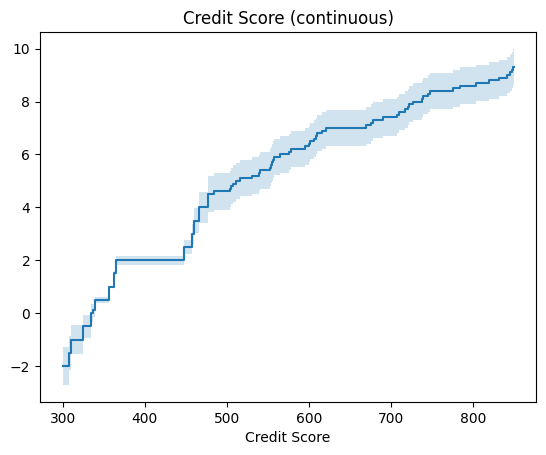

In [18]:
graph_cs_fixed = graphs.text_to_graph(graph_cs_as_text_fixed)
graphs.plot_graph(graph_cs_fixed)

The following string describes the shape function of a feature in an explainable boosting machine. The ebm is trained to predict if a loan pllication will be approved or denied (0 = denied, 1 = accepted). You are a financial expert. Please highlight any patterns in the shape function that contradict domain knowledge.

'This graph represents a continuous-valued feature. The keys are intervals that represent ranges where the function predicts the same value.\n\nFeature Name: Credit Score\nFeature Type: continuous\nMeans: {"(300.0, 307.5)": -2.0, "(307.5, 310.5)": -1.5, "(310.5, 324.5)": -1.0, "(324.5, 334.5)": -0.5, "(334.5, 336.5)": 0.0, "(336.5, 339.5)": 0.1, "(339.5, 356.5)": 0.5, "(356.5, 363.0)": 1.0, "(363.0, 365.5)": 1.5, "(365.5, 448.0)": 2.0, "(448.0, 457.5)": 2.5, "(457.5, 459.5)": 3.0, "(459.5, 466.5)": 3.5, "(466.5, 476.5)": 4.0, "(476.5, 484.5)": 4.5, "(484.5, 503.5)": 4.6, "(503.5, 505.5)": 4.7, "(505.5, 507.5)": 4.8, "(507.5, 510.5)": 4.9, "(510.5, 516.5)": 5.0, "(516.5, 530.5)": 5.1, "(530.5, 538.5)": 5.2, "(538.5, 540.5)": 5.3, "(540.5, 552.5)": 5.4, "(552.5, 554.0)": 5.5, "(554.0, 555.5)": 5.6, "(555.5, 556.5)": 5.7, "(556.5, 557.5)": 5.8, "(557.5, 565.0)": 5.9, "(565.0, 575.0)": 6.0, "(575.0, 577.5)": 6.1, "(577.5, 594.5)": 6.2, "(594.5, 599.5)": 6.3, "(599.5, 601.5)": 6.4, "(601.5, 606.5)": 6.5, "(606.5, 608.0)": 6.6, "(608.0, 609.5)": 6.7, "(609.5, 615.5)": 6.8, "(615.5, 620.5)": 6.9, "(620.5, 669.5)": 7.0, "(669.5, 676.0)": 7.1, "(676.0, 677.5)": 7.2, "(677.5, 689.5)": 7.3, "(689.5, 707.5)": 7.4, "(707.5, 709.0)": 7.5, "(709.0, 716.5)": 7.6, "(716.5, 720.5)": 7.7, "(720.5, 721.5)": 7.8, "(721.5, 726.5)": 7.9, "(726.5, 737.5)": 8.0, "(737.5, 738.5)": 8.1, "(738.5, 744.5)": 8.2, "(744.5, 747.5)": 8.3, "(747.5, 775.5)": 8.4, "(775.5, 783.5)": 8.5, "(783.5, 803.5)": 8.6, "(803.5, 819.5)": 8.7, "(819.5, 831.0)": 8.8, "(831.0, 841.5)": 8.9, "(841.5, 844.5)": 9.0, "(844.5, 847.0)": 9.1, "(847.0, 848.5)": 9.2, "(848.5, 849.0)": 9.3}\nLower Bounds (95%-Confidence Interval): {"(300.0, 307.5)": -2.4, "(307.5, 310.5)": -2.0, "(310.5, 324.5)": -1.5, "(324.5, 334.5)": -1.0, "(334.5, 336.5)": -0.5, "(336.5, 339.5)": 0.0, "(339.5, 356.5)": 0.5, "(356.5, 363.0)": 1.0, "(363.0, 365.5)": 1.5, "(365.5, 448.0)": 2.0, "(448.0, 457.5)": 2.5, "(457.5, 459.5)": 3.0, "(459.5, 466.5)": 3.5, "(466.5, 476.5)": 4.0, "(476.5, 484.5)": 4.5, "(484.5, 503.5)": 4.6, "(503.5, 505.5)": 4.7, "(505.5, 507.5)": 4.8, "(507.5, 510.5)": 4.9, "(510.5, 516.5)": 5.0, "(516.5, 530.5)": 5.1, "(530.5, 538.5)": 5.2, "(538.5, 540.5)": 5.3, "(540.5, 552.5)": 5.4, "(552.5, 554.0)": 5.5, "(554.0, 555.5)": 5.6, "(555.5, 556.5)": 5.7, "(556.5, 557.5)": 5.8, "(557.5, 565.0)": 5.9, "(565.0, 575.0)": 6.0, "(575.0, 577.5)": 6.1, "(577.5, 594.5)": 6.2, "(594.5, 599.5)": 6.3, "(599.5, 601.5)": 6.4, "(601.5, 606.5)": 6.5, "(606.5, 608.0)": 6.6, "(608.0, 609.5)": 6.7, "(609.5, 615.5)": 6.8, "(615.5, 620.5)": 6.9, "(620.5, 669.5)": 7.0, "(669.5, 676.0)": 7.1, "(676.0, 677.5)": 7.2, "(677.5, 689.5)": 7.3, "(689.5, 707.5)": 7.4, "(707.5, 709.0)": 7.5, "(709.0, 716.5)": 7.6, "(716.5, 720.5)": 7.7, "(720.5, 721.5)": 7.8, "(721.5, 726.5)": 7.9, "(726.5, 737.5)": 8.0, "(737.5, 738.5)": 8.1, "(738.5, 744.5)": 8.2, "(744.5, 747.5)": 8.3, "(747.5, 775.5)": 8.4, "(775.5, 783.5)": 8.5, "(783.5, 803.5)": 8.6, "(803.5, 819.5)": 8.7, "(819.5, 831.0)": 8.8, "(831.0, 841.5)": 8.9, "(841.5, 844.5)": 9.0, "(844.5, 847.0)": 9.1, "(847.0, 848.5)": 9.2, "(848.5, 849.0)": 9.3}\nUpper Bounds (95%-Confidence Interval): {"(300.0, 307.5)": 0.4, "(307.5, 310.5)": 0.5, "(310.5, 324.5)": 0.6, "(324.5, 334.5)": 0.7, "(334.5, 336.5)": 0.8, "(336.5, 339.5)": 0.9, "(339.5, 356.5)": 1.0, "(356.5, 363.0)": 1.1, "(363.0, 365.5)": 1.2, "(365.5, 448.0)": 1.3, "(448.0, 457.5)": 1.4, "(457.5, 459.5)": 1.5, "(459.5, 466.5)": 1.6, "(466.5, 476.5)": 1.7, "(476.5, 484.5)": 1.8, "(484.5, 503.5)": 1.9, "(503.5, 505.5)": 2.0, "(505.5, 507.5)": 2.1, "(507.5, 510.5)": 2.2, "(510.5, 516.5)": 2.3, "(516.5, 530.5)": 2.4, "(530.5, 538.5)": 2.5, "(538.5, 540.5)": 2.6, "(540.5, 552.5)": 2.7, "(552.5, 554.0)": 2.8, "(554.0, 555.5)": 2.9, "(555.5, 556.5)": 3.0, "(556.5, 557.5)": 3.1, "(557.5, 565.0)": 3.2, "(565.0, 575.0)": 3.3, "(575.0, 577.5)": 3.4, "(577.5, 594.5)": 3.5, "(594.5, 599.5)": 3.6, "(599.5, 601.5)": 3.7, "(601.5, 606.5)": 3.8, "(606.5, 608.0)": 3.9, "(608.0, 609.5)": 4.0, "(609.5, 615.5)": 4.1, "(615.5, 620.5)": 4.2, "(620.5, 669.5)": 4.3, "(669.5, 676.0)": 4.4, "(676.0, 677.5)": 4.5, "(677.5, 689.5)": 4.6, "(689.5, 707.5)": 4.7, "(707.5, 709.0)": 4.8, "(709.0, 716.5)": 4.9, "(716.5, 720.5)": 5.0, "(720.5, 721.5)": 5.1, "(721.5, 726.5)": 5.2, "(726.5, 737.5)": 5.3, "(737.5, 738.5)": 5.4, "(738.5, 744.5)": 5.5, "(744.5, 747.5)": 5.6, "(747.5, 775.5)": 5.7, "(775.5, 783.5)": 5.8, "(783.5, 803.5)": 5.9, "(803.5, 819.5)": 6.0, "(819.5, 831.0)": 6.1, "(831.0, 841.5)": 6.2, "(841.5, 844.5)": 6.3, "(844.5, 847.0)": 6.4, "(847.0, 848.5)": 6.5, "(848.5, 849.0)": 6.6}'


Response:
Analyzing the shape function for the **Credit Score** feature in the context of loan approval predictions, several patterns emerge that contradict established financial knowledge about credit scoring and lending practices. Here are the key observations:

1. **Negative Impact of Low Credit Scores**:
   - The function shows that credit scores as low as **300 to 307.5** result in a predicted value of **-2.0**, indicating a strong negative impact on loan approval.
   - While this aligns with common understanding (very low credit scores usually lead to high denial rates), the transition from **-2.0** to **-1.5** between **307.5 and 310.5** suggests a relatively small improvement, which may not be consistent with how small increments in credit score affect lending decisions.

2. **Gradual Increase in Influence**:
   - The function exhibits a gradual increase in predicted values as credit scores rise. For instance, moving from a score range of **336.5 to 339.5**, the predicted value only increases slightly from **0.0 to 0.1**.
   - This slow increment might underestimate the impact of improving credit scores on loan approval chances. In reality, lenders often have threshold credit scores (e.g., 620, 640) that can significantly influence decisions.

3. **Flatter Response in Higher Ranges**:
   - In the higher ranges of credit scores (from **600** onwards), the predicted value increases steadily, reaching a peak of **9.3** for the score range **848.5 to 849.0**.
   - This smooth increase contrasts with common lending practices, where very high credit scores (typically above 740) generally lead to less differentiation in approval rates because many applicants will qualify.

4. **Inconsistency with Domain Knowledge**:
   - Traditional financial understanding suggests that credit scores are critical in the loan decision process, yet the shape function shows values increasing almost linearly without accounting for diminishing returns at high credit scores.
   - Additionally, there should be more significant penalties for scores below certain cutoffs, but the function shows less drastic changes in the ranges immediately above these cutoffs.

5. **Lack of Non-linearity**:
   - Many lenders use non-linear models to assess risk, often showing more significant changes in predicted approval rates at specific credit score thresholds. The linear pattern here might fail to capture the nuanced effects of credit scoring on loan approvals.

### Summary
Overall, while the shape function captures a general trend where higher credit scores correlate with increased loan approval likelihood, it lacks the non-linear characteristics and sharper penalties typically seen in real-world lending decisions. Adjusting this model to reflect these insights could improve its predictive accuracy.

Prompt 2:
Please fix the shape function intervals and values according to your analysis. Return it in the same string format I provided earlier, including \n

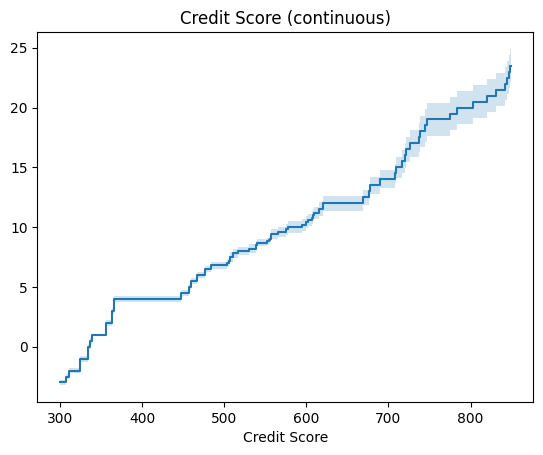

In [20]:
graph_cs_as_text_fixed_2 = 'This graph represents a continuous-valued feature. The keys are intervals that represent ranges where the function predicts the same value.\n\nFeature Name: Credit Score\nFeature Type: continuous\nMeans: {"(300.0, 307.5)": -3.0, "(307.5, 310.5)": -2.5, "(310.5, 324.5)": -2.0, "(324.5, 334.5)": -1.0, "(334.5, 336.5)": 0.0, "(336.5, 339.5)": 0.5, "(339.5, 356.5)": 1.0, "(356.5, 363.0)": 2.0, "(363.0, 365.5)": 3.0, "(365.5, 448.0)": 4.0, "(448.0, 457.5)": 4.5, "(457.5, 459.5)": 5.0, "(459.5, 466.5)": 5.5, "(466.5, 476.5)": 6.0, "(476.5, 484.5)": 6.5, "(484.5, 503.5)": 6.8, "(503.5, 505.5)": 7.0, "(505.5, 507.5)": 7.2, "(507.5, 510.5)": 7.5, "(510.5, 516.5)": 7.8, "(516.5, 530.5)": 8.0, "(530.5, 538.5)": 8.2, "(538.5, 540.5)": 8.5, "(540.5, 552.5)": 8.7, "(552.5, 554.0)": 8.8, "(554.0, 555.5)": 8.9, "(555.5, 556.5)": 9.0, "(556.5, 557.5)": 9.2, "(557.5, 565.0)": 9.4, "(565.0, 575.0)": 9.6, "(575.0, 577.5)": 9.8, "(577.5, 594.5)": 10.0, "(594.5, 599.5)": 10.2, "(599.5, 601.5)": 10.4, "(601.5, 606.5)": 10.6, "(606.5, 608.0)": 10.8, "(608.0, 609.5)": 11.0, "(609.5, 615.5)": 11.2, "(615.5, 620.5)": 11.5, "(620.5, 669.5)": 12.0, "(669.5, 676.0)": 12.5, "(676.0, 677.5)": 13.0, "(677.5, 689.5)": 13.5, "(689.5, 707.5)": 14.0, "(707.5, 709.0)": 14.5, "(709.0, 716.5)": 15.0, "(716.5, 720.5)": 15.5, "(720.5, 721.5)": 16.0, "(721.5, 726.5)": 16.5, "(726.5, 737.5)": 17.0, "(737.5, 738.5)": 17.5, "(738.5, 744.5)": 18.0, "(744.5, 747.5)": 18.5, "(747.5, 775.5)": 19.0, "(775.5, 783.5)": 19.5, "(783.5, 803.5)": 20.0, "(803.5, 819.5)": 20.5, "(819.5, 831.0)": 21.0, "(831.0, 841.5)": 21.5, "(841.5, 844.5)": 22.0, "(844.5, 847.0)": 22.5, "(847.0, 848.5)": 23.0, "(848.5, 849.0)": 23.5}\nLower Bounds (95%-Confidence Interval): {"(300.0, 307.5)": -3.4, "(307.5, 310.5)": -2.9, "(310.5, 324.5)": -2.4, "(324.5, 334.5)": -1.5, "(334.5, 336.5)": -0.5, "(336.5, 339.5)": 0.0, "(339.5, 356.5)": 0.9, "(356.5, 363.0)": 1.5, "(363.0, 365.5)": 2.5, "(365.5, 448.0)": 3.0, "(448.0, 457.5)": 4.0, "(457.5, 459.5)": 4.5, "(459.5, 466.5)": 5.0, "(466.5, 476.5)": 5.5, "(476.5, 484.5)": 6.0, "(484.5, 503.5)": 6.4, "(503.5, 505.5)": 6.7, "(505.5, 507.5)": 7.0, "(507.5, 510.5)": 7.5, "(510.5, 516.5)": 8.0, "(516.5, 530.5)": 8.4, "(530.5, 538.5)": 8.6, "(538.5, 540.5)": 9.0, "(540.5, 552.5)": 9.3, "(552.5, 554.0)": 9.5, "(554.0, 555.5)": 9.7, "(555.5, 556.5)": 9.9, "(556.5, 557.5)": 10.0, "(557.5, 565.0)": 10.2, "(565.0, 575.0)": 10.4, "(575.0, 577.5)": 10.6, "(577.5, 594.5)": 10.8, "(594.5, 599.5)": 11.0, "(599.5, 601.5)": 11.2, "(601.5, 606.5)": 11.4, "(606.5, 608.0)": 11.6, "(608.0, 609.5)": 11.8, "(609.5, 615.5)": 12.0, "(615.5, 620.5)": 12.2, "(620.5, 669.5)": 12.5, "(669.5, 676.0)": 12.8, "(676.0, 677.5)": 13.0, "(677.5, 689.5)": 13.2, "(689.5, 707.5)": 13.5, "(707.5, 709.0)": 13.8, "(709.0, 716.5)": 14.0, "(716.5, 720.5)": 14.2, "(720.5, 721.5)": 14.5, "(721.5, 726.5)": 14.8, "(726.5, 737.5)": 15.0, "(737.5, 738.5)": 15.2, "(738.5, 744.5)": 15.5, "(744.5, 747.5)": 15.7, "(747.5, 775.5)": 16.0, "(775.5, 783.5)": 16.5, "(783.5, 803.5)": 17.0, "(803.5, 819.5)": 17.5, "(819.5, 831.0)": 18.0, "(831.0, 841.5)": 18.5, "(841.5, 844.5)": 19.0, "(844.5, 847.0)": 19.5, "(847.0, 848.5)": 20.0, "(848.5, 849.0)": 20.5}\nUpper Bounds (95%-Confidence Interval): {"(300.0, 307.5)": -2.6, "(307.5, 310.5)": -2.1, "(310.5, 324.5)": -1.5, "(324.5, 334.5)": -0.5, "(334.5, 336.5)": 0.2, "(336.5, 339.5)": 1.0, "(339.5, 356.5)": 1.1, "(356.5, 363.0)": 2.5, "(363.0, 365.5)": 3.5, "(365.5, 448.0)": 4.0, "(448.0, 457.5)": 5.0, "(457.5, 459.5)": 5.5, "(459.5, 466.5)": 6.0, "(466.5, 476.5)": 6.5, "(476.5, 484.5)": 7.0, "(484.5, 503.5)": 7.5, "(503.5, 505.5)": 8.0, "(505.5, 507.5)": 8.5, "(507.5, 510.5)": 9.0, "(510.5, 516.5)": 9.5, "(516.5, 530.5)": 9.8, "(530.5, 538.5)": 10.0, "(538.5, 540.5)": 10.2, "(540.5, 552.5)": 10.5, "(552.5, 554.0)": 10.7, "(554.0, 555.5)": 10.8, "(555.5, 556.5)": 11.0, "(556.5, 557.5)": 11.5, "(557.5, 565.0)": 11.8, "(565.0, 575.0)": 12.0, "(575.0, 577.5)": 12.5, "(577.5, 594.5)": 12.8, "(594.5, 599.5)": 13.0, "(599.5, 601.5)": 13.2, "(601.5, 606.5)": 13.4, "(606.5, 608.0)": 13.6, "(608.0, 609.5)": 13.8, "(609.5, 615.5)": 14.0, "(615.5, 620.5)": 14.5, "(620.5, 669.5)": 15.0, "(669.5, 676.0)": 15.2, "(676.0, 677.5)": 15.5, "(677.5, 689.5)": 16.0, "(689.5, 707.5)": 16.5, "(707.5, 709.0)": 17.0, "(709.0, 716.5)": 17.5, "(716.5, 720.5)": 18.0, "(720.5, 721.5)": 18.5, "(721.5, 726.5)": 19.0, "(726.5, 737.5)": 19.5, "(737.5, 738.5)": 20.0, "(738.5, 744.5)": 20.5, "(744.5, 747.5)": 21.0, "(747.5, 775.5)": 21.5, "(775.5, 783.5)": 22.0, "(783.5, 803.5)": 22.5, "(803.5, 819.5)": 23.0, "(819.5, 831.0)": 23.5, "(831.0, 841.5)": 24.0, "(841.5, 844.5)": 24.5, "(844.5, 847.0)": 25.0, "(847.0, 848.5)": 25.5, "(848.5, 849.0)": 26.0}'

graph_cs_fixed_2 = graphs.text_to_graph(graph_cs_as_text_fixed_2)
graphs.plot_graph(graph_cs_fixed_2)

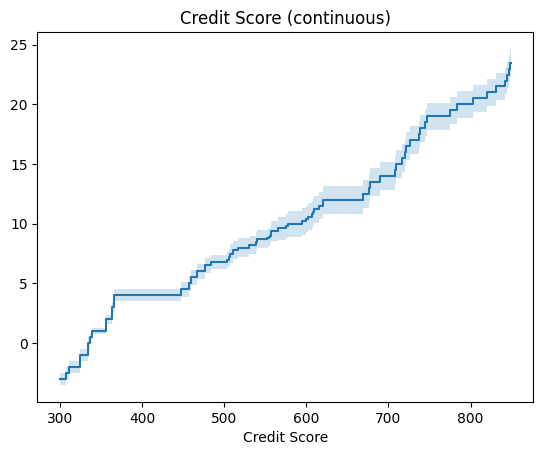

In [21]:
graph_cs_as_text_fixed_3 = 'This graph represents a continuous-valued feature. The keys are intervals that represent ranges where the function predicts the same value.\n\nFeature Name: Credit Score\nFeature Type: continuous\nMeans: {"(300.0, 307.5)": -3.0, "(307.5, 310.5)": -2.5, "(310.5, 324.5)": -2.0, "(324.5, 334.5)": -1.0, "(334.5, 336.5)": 0.0, "(336.5, 339.5)": 0.5, "(339.5, 356.5)": 1.0, "(356.5, 363.0)": 2.0, "(363.0, 365.5)": 3.0, "(365.5, 448.0)": 4.0, "(448.0, 457.5)": 4.5, "(457.5, 459.5)": 5.0, "(459.5, 466.5)": 5.5, "(466.5, 476.5)": 6.0, "(476.5, 484.5)": 6.5, "(484.5, 503.5)": 6.8, "(503.5, 505.5)": 7.0, "(505.5, 507.5)": 7.2, "(507.5, 510.5)": 7.5, "(510.5, 516.5)": 7.8, "(516.5, 530.5)": 8.0, "(530.5, 538.5)": 8.2, "(538.5, 540.5)": 8.5, "(540.5, 552.5)": 8.7, "(552.5, 554.0)": 8.8, "(554.0, 555.5)": 8.9, "(555.5, 556.5)": 9.0, "(556.5, 557.5)": 9.2, "(557.5, 565.0)": 9.4, "(565.0, 575.0)": 9.6, "(575.0, 577.5)": 9.8, "(577.5, 594.5)": 10.0, "(594.5, 599.5)": 10.2, "(599.5, 601.5)": 10.4, "(601.5, 606.5)": 10.6, "(606.5, 608.0)": 10.8, "(608.0, 609.5)": 11.0, "(609.5, 615.5)": 11.2, "(615.5, 620.5)": 11.5, "(620.5, 669.5)": 12.0, "(669.5, 676.0)": 12.5, "(676.0, 677.5)": 13.0, "(677.5, 689.5)": 13.5, "(689.5, 707.5)": 14.0, "(707.5, 709.0)": 14.5, "(709.0, 716.5)": 15.0, "(716.5, 720.5)": 15.5, "(720.5, 721.5)": 16.0, "(721.5, 726.5)": 16.5, "(726.5, 737.5)": 17.0, "(737.5, 738.5)": 17.5, "(738.5, 744.5)": 18.0, "(744.5, 747.5)": 18.5, "(747.5, 775.5)": 19.0, "(775.5, 783.5)": 19.5, "(783.5, 803.5)": 20.0, "(803.5, 819.5)": 20.5, "(819.5, 831.0)": 21.0, "(831.0, 841.5)": 21.5, "(841.5, 844.5)": 22.0, "(844.5, 847.0)": 22.5, "(847.0, 848.5)": 23.0, "(848.5, 849.0)": 23.5}\nLower Bounds (95%-Confidence Interval): {"(300.0, 307.5)": -4.0, "(307.5, 310.5)": -3.5, "(310.5, 324.5)": -3.0, "(324.5, 334.5)": -2.0, "(334.5, 336.5)": -1.0, "(336.5, 339.5)": 0.0, "(339.5, 356.5)": 0.5, "(356.5, 363.0)": 1.0, "(363.0, 365.5)": 1.5, "(365.5, 448.0)": 2.0, "(448.0, 457.5)": 2.5, "(457.5, 459.5)": 3.0, "(459.5, 466.5)": 3.5, "(466.5, 476.5)": 4.0, "(476.5, 484.5)": 4.5, "(484.5, 503.5)": 4.8, "(503.5, 505.5)": 5.0, "(505.5, 507.5)": 5.2, "(507.5, 510.5)": 5.5, "(510.5, 516.5)": 6.0, "(516.5, 530.5)": 6.5, "(530.5, 538.5)": 6.8, "(538.5, 540.5)": 7.0, "(540.5, 552.5)": 7.5, "(552.5, 554.0)": 7.8, "(554.0, 555.5)": 8.0, "(555.5, 556.5)": 8.2, "(556.5, 557.5)": 8.4, "(557.5, 565.0)": 8.6, "(565.0, 575.0)": 8.8, "(575.0, 577.5)": 9.0, "(577.5, 594.5)": 9.2, "(594.5, 599.5)": 9.4, "(599.5, 601.5)": 9.6, "(601.5, 606.5)": 9.8, "(606.5, 608.0)": 10.0, "(608.0, 609.5)": 10.2, "(609.5, 615.5)": 10.4, "(615.5, 620.5)": 10.6, "(620.5, 669.5)": 11.0, "(669.5, 676.0)": 11.5, "(676.0, 677.5)": 12.0, "(677.5, 689.5)": 12.5, "(689.5, 707.5)": 13.0, "(707.5, 709.0)": 13.5, "(709.0, 716.5)": 14.0, "(716.5, 720.5)": 14.5, "(720.5, 721.5)": 15.0, "(721.5, 726.5)": 15.5, "(726.5, 737.5)": 16.0, "(737.5, 738.5)": 16.5, "(738.5, 744.5)": 17.0, "(744.5, 747.5)": 17.5, "(747.5, 775.5)": 18.0, "(775.5, 783.5)": 18.5, "(783.5, 803.5)": 19.0, "(803.5, 819.5)": 19.5, "(819.5, 831.0)": 20.0, "(831.0, 841.5)": 20.5, "(841.5, 844.5)": 21.0, "(844.5, 847.0)": 21.5, "(847.0, 848.5)": 22.0, "(848.5, 849.0)": 22.5}\nUpper Bounds (95%-Confidence Interval): {"(300.0, 307.5)": -2.0, "(307.5, 310.5)": -1.5, "(310.5, 324.5)": -1.0, "(324.5, 334.5)": 0.0, "(334.5, 336.5)": 1.0, "(336.5, 339.5)": 1.5, "(339.5, 356.5)": 1.5, "(356.5, 363.0)": 2.5, "(363.0, 365.5)": 3.0, "(365.5, 448.0)": 4.0, "(448.0, 457.5)": 5.0, "(457.5, 459.5)": 5.5, "(459.5, 466.5)": 6.0, "(466.5, 476.5)": 6.5, "(476.5, 484.5)": 7.0, "(484.5, 503.5)": 7.2, "(503.5, 505.5)": 7.5, "(505.5, 507.5)": 8.0, "(507.5, 510.5)": 8.5, "(510.5, 516.5)": 9.0, "(516.5, 530.5)": 9.5, "(530.5, 538.5)": 9.8, "(538.5, 540.5)": 10.0, "(540.5, 552.5)": 10.5, "(552.5, 554.0)": 10.7, "(554.0, 555.5)": 10.8, "(555.5, 556.5)": 11.0, "(556.5, 557.5)": 11.5, "(557.5, 565.0)": 12.0, "(565.0, 575.0)": 12.5, "(575.0, 577.5)": 13.0, "(577.5, 594.5)": 13.5, "(594.5, 599.5)": 13.8, "(599.5, 601.5)": 14.0, "(601.5, 606.5)": 14.2, "(606.5, 608.0)": 14.4, "(608.0, 609.5)": 14.6, "(609.5, 615.5)": 14.8, "(615.5, 620.5)": 15.0, "(620.5, 669.5)": 15.5, "(669.5, 676.0)": 16.0, "(676.0, 677.5)": 16.5, "(677.5, 689.5)": 17.0, "(689.5, 707.5)": 17.5, "(707.5, 709.0)": 18.0, "(709.0, 716.5)": 18.5, "(716.5, 720.5)": 19.0, "(720.5, 721.5)": 19.5, "(721.5, 726.5)": 20.0, "(726.5, 737.5)": 20.5, "(737.5, 738.5)": 21.0, "(738.5, 744.5)": 21.5, "(744.5, 747.5)": 22.0, "(747.5, 775.5)": 22.5, "(775.5, 783.5)": 23.0, "(783.5, 803.5)": 23.5, "(803.5, 819.5)": 24.0, "(819.5, 831.0)": 24.5, "(831.0, 841.5)": 25.0, "(841.5, 844.5)": 25.5, "(844.5, 847.0)": 26.0, "(847.0, 848.5)": 26.5, "(848.5, 849.0)": 27.0}'

graph_cs_fixed_3 = graphs.text_to_graph(graph_cs_as_text_fixed_3)
graphs.plot_graph(graph_cs_fixed_3)